## The *normal equation*

In [1]:
import numpy as np

In [2]:
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)

Looking at our data

In [3]:
import matplotlib.pyplot as plt

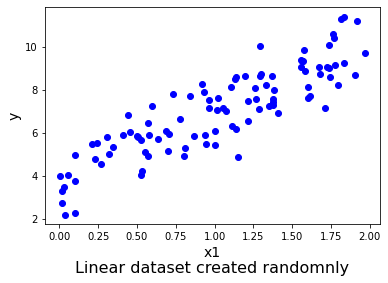

In [4]:
plt.scatter(X,y,color='blue')
plt.ylabel('y', fontsize=14)
plt.xlabel('x1', fontsize=14)
plt.title('Linear dataset created randomnly', fontsize=16, y=-0.25);

Computing the Normal Equation

In [5]:
X_b = np.c_[np.ones((100, 1)), X] 
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [6]:
theta_best

array([[3.78161812],
       [3.18405221]])

Making predictions

In [7]:
X_new = np.array([[0], [2]])
X_new_b= np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.78161812],
       [10.14972254]])

Plotting the predictions

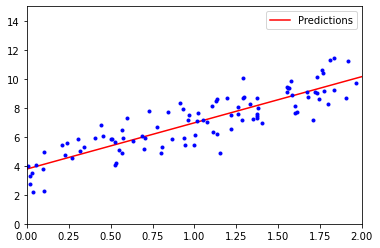

In [8]:
plt.plot(X_new, y_predict, 'r-', label='Predictions')
plt.plot(X, y, "b.")
plt.axis([0, 2,0, 15])
plt.legend()
plt.show()

Alternatively, we could perform the same analysis using Scikit-Learn Linear Regression

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_ 

(array([3.78161812]), array([[3.18405221]]))

In [11]:
lin_reg.predict(X_new)

array([[ 3.78161812],
       [10.14972254]])

## Computational complexity
Although these methdods were able get to the same results, the computational complexity of the Normal Equation is far greater. In this sense, the implementation on Sickit-Learn (SVD) is able to achieve results much faster, especially when dealing with larger datasets and with more features.

On the other hand both NE and SVD are very slow when the number of features grows very large (e.g 100,000).

## Gradient descent
Gradient descent is a generic optimization algorithm that works by tweaking the parameters and testing the results of the new model iteratively.

The initial values to start the process of GD is set randomly, in this sense one will not find the best solution, but will find one of the best solutions possible (given the randomness of the process).

Depending on the learning rate parameter set, we could end up jumping across the valley and ending up on the other side, possibly higher up. This indicates a failure on finding a good solution.

In addition, the GD optimization curves are not always a smooth descent until the rock bottom. In fact, if we find a good value and stop the process too early we might eventually be selecting the local minimum, instead the global minimum that would be achieved by some extra steps. On the other hand, if we keep finding bad results in a row and stop the process thinking that it has come to a stalemate, we might miss the optimal result that was just some steps away.

When talking about the MSE cost function on a Linear Regression, we have a *convex* function. This implies that there are no local minima, just one global minimum. This has the following consequence: GD is guaranteed to approach arbitrairly close to the global minimum (if we wait long enough). On the other hand it is also important to note that the scales of the variables that we are working influence the speed of the model to reach the global minimum. It is usually a good idea to standardize the scales.

Implementing a MSE GD function basically means calculating the MSE for every small variance for each parameter present in our **X** matrix. Briefly, it would be like calculating the angle of the ground when looking forward, backward, left, right, ... and this would be expanded for as many dimensions as many features we have. Although it is a bit trippy, that is the feel of it. 

The batch GD function (as this approach is called) can be easily expanded to work with thousands of features in an effective way. On the other hand, it is terribly slow when working with larger datasets.

Still, it is far better than the Normal Equation or SVD decomposition.

In [12]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100

In [13]:
theta = np.random.randn(2,1) #random initialization

In [14]:
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [15]:
theta

array([[3.78161812],
       [3.18405221]])

Choosing the best learning rate is optimal for getting the best solutions. This can be done using the GridSearch method that we saw in previous chapters. The problem is that this can take a long time. A good idea would be to limit the number of iterations so that the test does not take too long. Other good approach would be to set a very large number of iterations but to interrupt the algorithm when the gradient vector becomes tiny, when its norm becomes smaller than a tiny number e (called tolerance) because this happens when the gradient has almost reached the minimum 

## Stochastic Gradient Descent
THe main problem with Batch Gradien Descent (BGD) is the fact that it uses the whole trianing set to compute the gradients at every step, which makes it very slow as the training set gets bigger. On the other hand SGD, randomly choses one instance to calculate gradients at every step. This is much (much) faster than BGD, since we work with one instance versus the whole dataset. On the other hand, given the stochastic nature (randomness) of SGD, this algorithm is much less regular. This makes the cost function to oscilate up and down, making big leaps. This is good for escaping local minima, but will probably never get to the optimal place. 

A good practice would be to mix both approaches. Start with bigger learning rates and then minimize them as the cost function becomes lower and lower. This can also be refered to as *learning schedule*.

In [20]:
n_epochs = 50
t0, t1 = 5, 50 #learning schedule parameters

In [21]:
def learning_schedule(t):
    return t0 / (t + t1)

In [22]:
theta = np.random.randn(2,1) # random initialization

In [23]:
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [24]:
theta

array([[3.84476495],
       [3.21902688]])

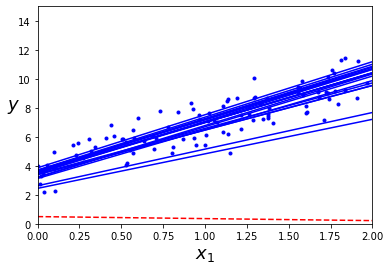

In [27]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                    # not shown in the book
            y_predict = X_new_b.dot(theta)           # not shown
            style = "b-" if i > 0 else "r--"         # not shown
            plt.plot(X_new, y_predict, style)        # not shown
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                 # not shown

plt.plot(X, y, "b.")                                 # not shown
plt.xlabel("$x_1$", fontsize=18)                     # not shown
plt.ylabel("$y$", rotation=0, fontsize=18)           # not shown
plt.axis([0, 2, 0, 15])                              # not shown
plt.show()     